In [1]:
import tmm as tm

In [2]:
dir(tm)

['EPSILON',
 'R_from_r',
 'T_from_t',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 'absolute_import',
 'absorp_analytic_fn',
 'absorp_in_each_layer',
 'array',
 'coh_tmm',
 'coh_tmm_reverse',
 'conj',
 'cos',
 'division',
 'ellips',
 'exp',
 'find_in_structure',
 'find_in_structure_with_inf',
 'inc_absorp_in_each_layer',
 'inc_find_absorp_analytic_fn',
 'inc_group_layers',
 'inc_tmm',
 'inf',
 'interface_R',
 'interface_T',
 'interface_r',
 'interface_t',
 'isnan',
 'layer_starts',
 'list_snell',
 'make_2x2_array',
 'nan',
 'np',
 'position_resolved',
 'power_entering_from_r',
 'print_function',
 'snell',
 'sp',
 'sys',
 'tmm_core',
 'unpolarized_RT',
 'zeros']

In [3]:
import tmm.examples

In [4]:
dir(tmm.examples)

['__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 'absolute_import',
 'array',
 'coh_tmm',
 'colors_were_imported',
 'degree',
 'division',
 'ellips',
 'find_in_structure_with_inf',
 'inf',
 'interp1d',
 'linspace',
 'pi',
 'plt',
 'position_resolved',
 'print_function',
 'sample1',
 'sample2',
 'sample3',
 'sample4',
 'sample5',
 'unpolarized_RT']

In [5]:
tmm.examples.sample1()

In [2]:
from __future__ import division, print_function, absolute_import

from tmm import (coh_tmm, unpolarized_RT, ellips,
                       position_resolved, find_in_structure_with_inf)

from numpy import pi, linspace, inf, array
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# "5 * degree" is 5 degrees expressed in radians
# "1.2 / degree" is 1.2 radians expressed in degrees
degree = pi/180

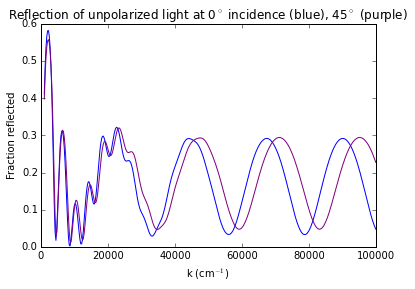

In [5]:
"""
Here's a thin non-absorbing layer, on top of a thick absorbing layer, with
air on both sides. Plotting reflected intensity versus wavenumber, at two
different incident angles.
"""
# list of layer thicknesses in nm
d_list = [inf,100,300,inf]
# list of refractive indices
n_list = [1,2.2,3.3+0.3j,1]
# list of wavenumbers to plot in nm^-1
ks=linspace(0.0001,.01,num=400)
# initialize lists of y-values to plot
Rnorm=[] 
R45=[]
for k in ks:
    # For normal incidence, s and p polarizations are identical.
    # I arbitrarily decided to use 's'.
    Rnorm.append(coh_tmm('s',n_list, d_list, 0, 1/k)['R'])
    R45.append(unpolarized_RT(n_list, d_list, 45*degree, 1/k)['R'])
kcm = ks * 1e7 #ks in cm^-1 rather than nm^-1
plt.figure()
plt.plot(kcm,Rnorm,'blue',kcm,R45,'purple')
plt.xlabel('k (cm$^{-1}$)')
plt.ylabel('Fraction reflected')
plt.title('Reflection of unpolarized light at 0$^\circ$ incidence (blue), '
            '45$^\circ$ (purple)');

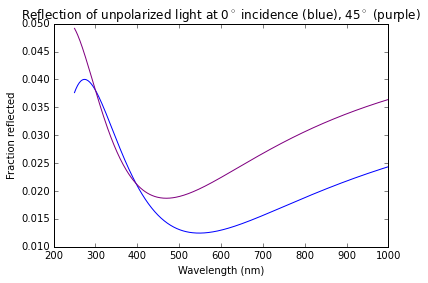

In [9]:
"""
Here's a thin non-absorbing layer, on top of a thick absorbing layer, with
air on both sides. Plotting reflected intensity versus wavenumber, at two
different incident angles.
"""
# list of layer thicknesses in nm
d_list = [inf,100,inf]
# list of refractive indices
n_list = [1,1.37,1.5]
# list of wavenumbers to plot in nm^-1
wl = linspace(250,1000,num=400)
# initialize lists of y-values to plot
Rnorm=[] 
R45=[]
for w in wl:
    # For normal incidence, s and p polarizations are identical.
    # I arbitrarily decided to use 's'.
    Rnorm.append(coh_tmm('s',n_list, d_list, 0, w)['R'])
    R45.append(unpolarized_RT(n_list, d_list, 45*degree, w)['R'])
kcm = ks * 1e7 #ks in cm^-1 rather than nm^-1
plt.figure()
plt.plot(wl,Rnorm,'blue',wl,R45,'purple')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Fraction reflected')
plt.title('Reflection of unpolarized light at 0$^\circ$ incidence (blue), '
            '45$^\circ$ (purple)');

In [12]:
help(coh_tmm)

Help on function coh_tmm in module tmm.tmm_core:

coh_tmm(pol, n_list, d_list, th_0, lam_vac)
    Main "coherent transfer matrix method" calc. Given parameters of a stack,
    calculates everything you could ever want to know about how light
    propagates in it. (If performance is an issue, you can delete some of the
    calculations without affecting the rest.)
    
    pol is light polarization, "s" or "p".
    
    n_list is the list of refractive indices, in the order that the light would
    pass through them. The 0'th element of the list should be the semi-infinite
    medium from which the light enters, the last element should be the semi-
    infinite medium to which the light exits (if any exits).
    
    th_0 is the angle of incidence: 0 for normal, pi/2 for glancing.
    Remember, for a dissipative incoming medium (n_list[0] is not real), th_0
    should be complex so that n0 sin(th0) is real (intensity is constant as
    a function of lateral position).
    
    d_list is